# **1. Entendimiento del Negocio**

La unidad de psicología de un hospital universitario quiere entender los patrones y efectos sobre el uso de SmartPhones entre los jóvenes, haciendo un enfoque especial en entender niveles de adicción al uso de este tipo de dispositivos. La intención es entonces conocer cuáles pueden ser los efectos en cuanto a la posibilidad de desarrollar niveles de adicción.

# **2. Enfoque Analítico**

Desarrollar un experimento de clasificación que permita determinar los niveles de adicción de jóvenes con un nivel de desempeño superior al 85%

# **3. Requerimiento de Datos**

- Datos comportamentales
- Datos demográficos
- Datos de hábitos
- Nivel de adicción (Modelo de aprendizaje Supervisado)

# **4. Recolección de los Datos**

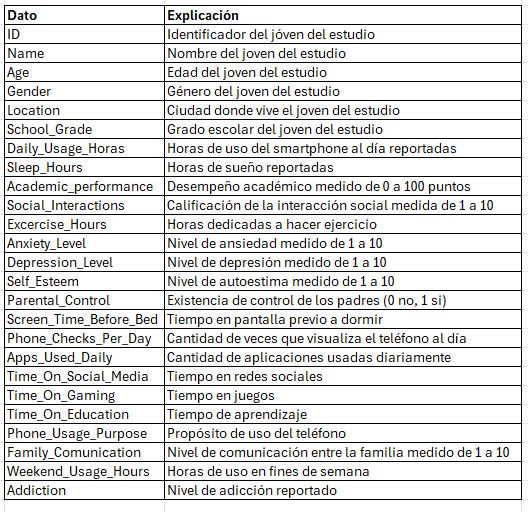

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Importación de los datos
data = pd.read_csv('data_clf.csv')
data

ID               Name  Age  Gender          Location School_Grade  \
0        1    Shannon Francis   13  Female        Hansonfort          9th   
1        2    Scott Rodriguez   17  Female      Theodorefort          7th   
2        3        Adrian Knox   13   Other       Lindseystad         11th   
3        4  Brittany Hamilton   18  Female      West Anthony         12th   
4        5       Steven Smith   14   Other  Port Lindsaystad          9th   
...    ...                ...  ...     ...               ...          ...   
2995  2996        Jesus Yates   16  Female      New Jennifer         12th   
2996  2997     Bethany Murray   13  Female       Richardport          8th   
2997  2998      Norman Hughes   14   Other        Rebeccaton          7th   
2998  2999     Barbara Hinton   17  Female      Ramirezmouth          9th   
2999  3000     Curtis Johnson   17    Male    Lake Alexander         10th   

      Daily_Usage_Hours  Sleep_Hours  Academic_Performance  \
0                   4.0          6.1                  78.0   
1                   5.5          6.5                  70.0   
2                   5.8          5.5                  93.0   
3                   3.1          3.9                  78.0   
4                   2.5          6.7                  56.0   
...                 ...          ...                   ...   
2995                3.9          6.4                  53.0   
2996                3.6          7.3                  93.0   
2997                3.2          6.5                  98.0   
2998                6.7          7.5                  67.0   
2999                3.5          6.9                  79.0   

      Social_Interactions  ...  Screen_Time_Before_Bed  Phone_Checks_Per_Day  \
0                     5.0  ...                     1.4                    86   
1                     5.0  ...                     0.9                    96   
2                     8.0  ...                     0.5                   137   
3                     8.0  ...                     1.4                   128   
4                     4.0  ...                     1.0                    96   
...                   ...  ...                     ...                   ...   
2995                  4.0  ...                     0.3                    80   
2996                  5.0  ...                     0.9                    45   
2997                  1.0  ...                     0.2                    51   
2998                  3.0  ...                     1.6                   125   
2999                  4.0  ...                     0.6                   117   

      Apps_Used_Daily  Time_on_Social_Media  Time_on_Gaming  \
0                19.0                   3.6             1.7   
1                 9.0                   1.1             4.0   
2                 8.0                   0.3             1.5   
3                 7.0                   3.1             1.6   
4                20.0                   2.6             0.9   
...               ...                   ...             ...   
2995             15.0                   2.7             1.8   
2996              8.0                   3.1             0.0   
2997             13.0                   2.4             0.2   
2998             17.0                   1.7             2.6   
2999              8.0                   0.0             NaN   

      Time_on_Education  Phone_Usage_Purpose  Family_Communication  \
0                   1.2             Browsing                   4.0   
1                   1.8             Browsing                   2.0   
2                   0.4            Education                   6.0   
3                   0.8         Social Media                   8.0   
4                   1.1               Gaming                  10.0   
...                 ...                  ...                   ...   
2995                1.0                  NaN                   8.0   
2996                0.3               Gaming                

# **5. Entendimiento de los datos**

- Datos nulos
- Estadísticas univariada, bivariada y multivariada
- Desbalance de y (Para el modelo de clasificación)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Identificación de datos nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       2900 non-null   float64
 7   Sleep_Hours             2900 non-null   float64
 8   Academic_Performance    2900 non-null   float64
 9   Social_Interactions     2900 non-null   float64
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           2900 non-null   float64
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        2900 non-null   

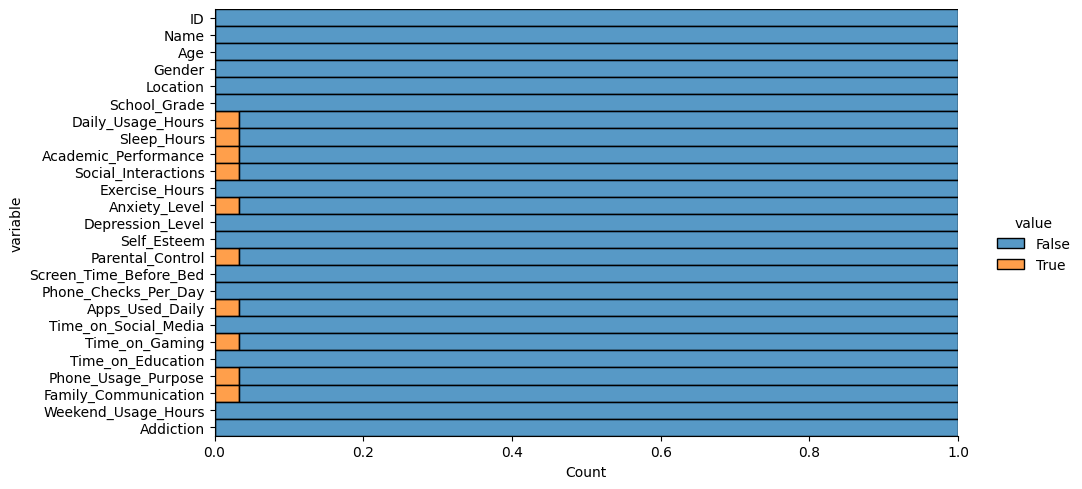

In [4]:
#Visualizar la proporción de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

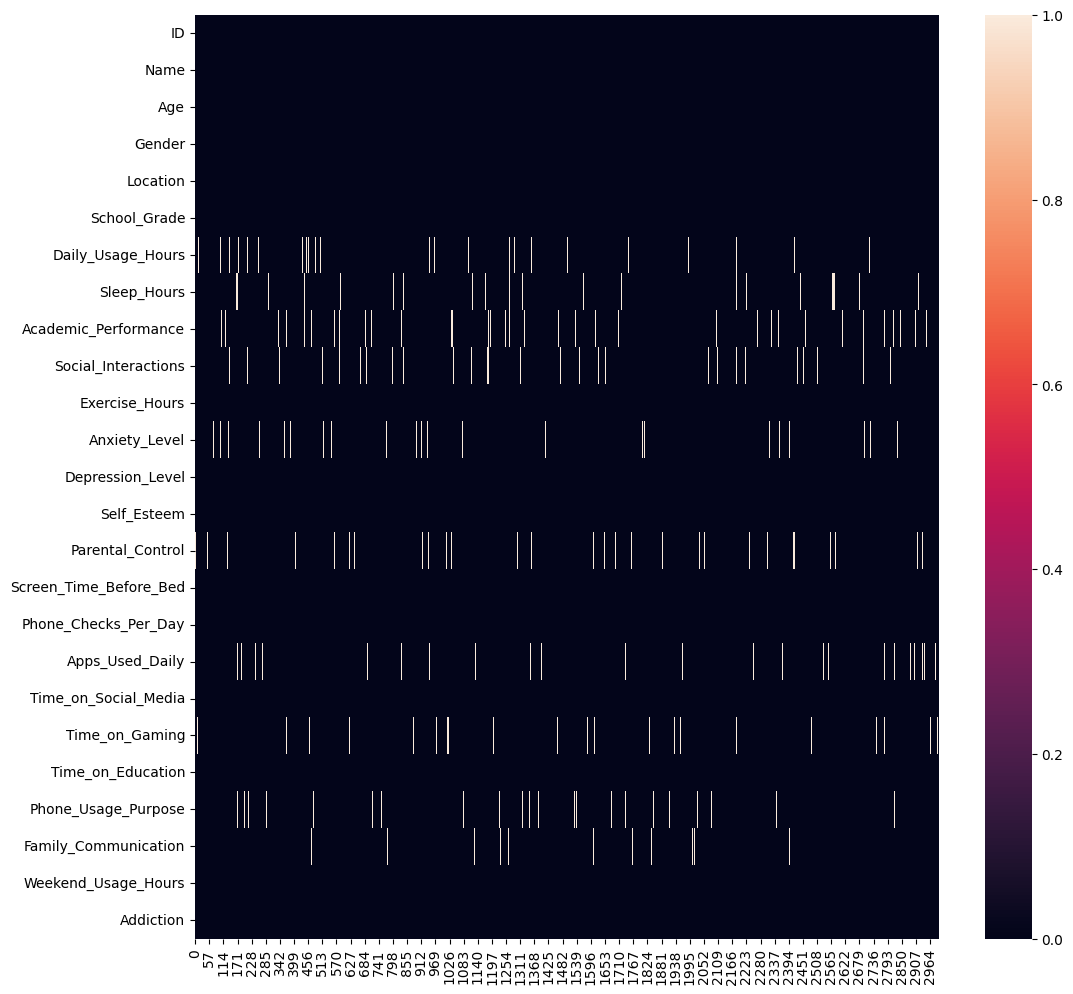

In [5]:
plt.figure(figsize = (12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

Los datos nulos están dispersos en varios registros, por lo que al eliminarlos se eliminarían más del 10% de los datos. La mejor estrategia es imputar los datos nulos. 

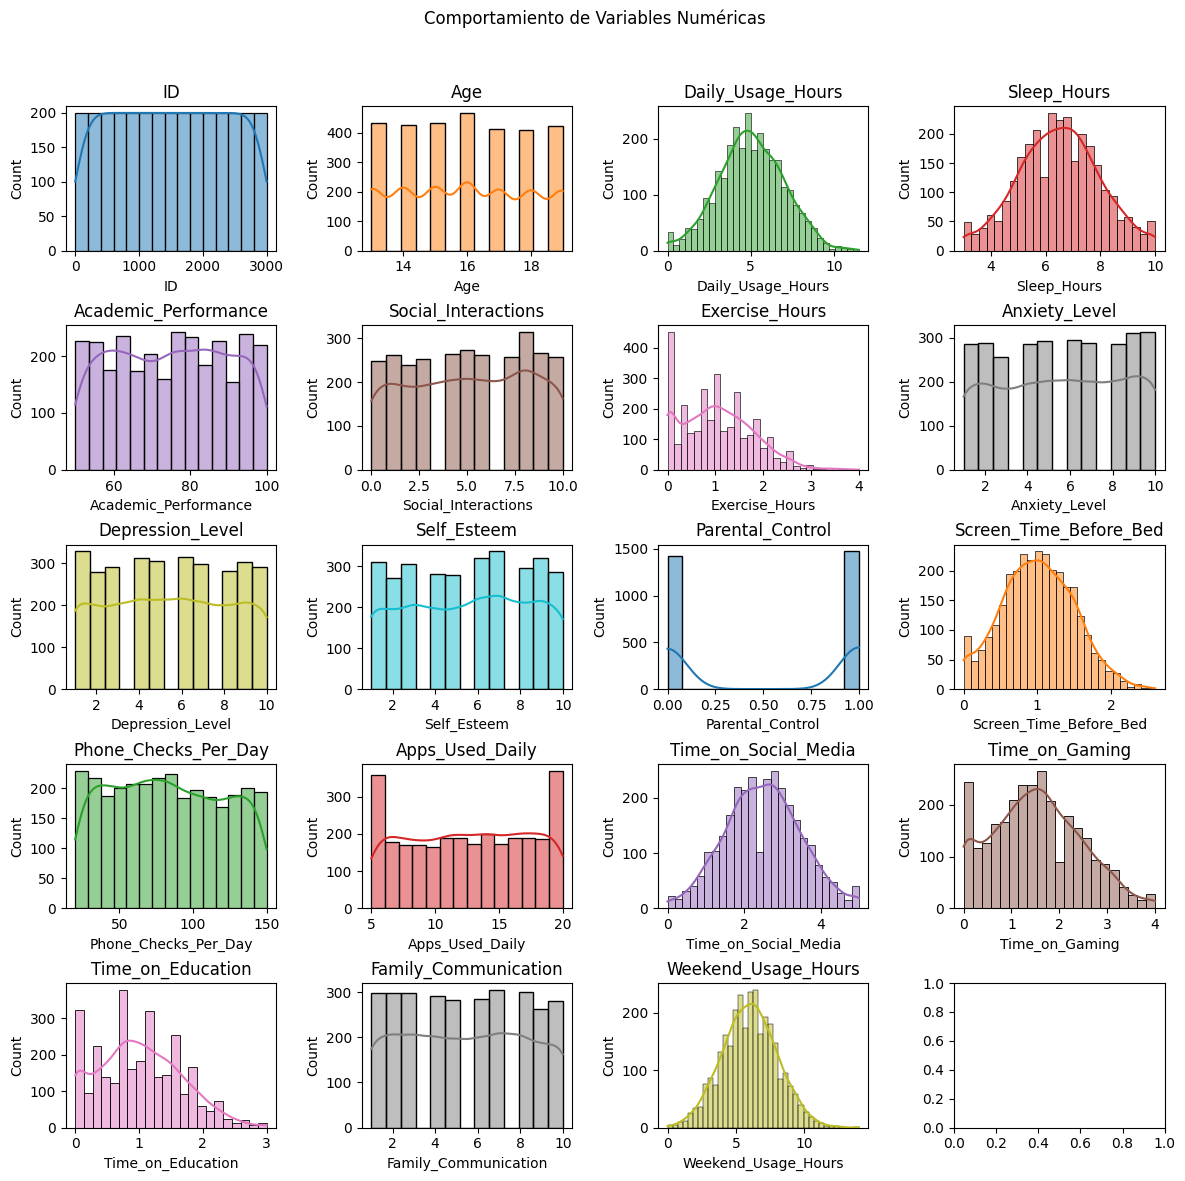

In [6]:
#Exploración univariada de los datos
##Para datos numéricos: histogramas de frecuencia
##Para datos categóricos: gráficos de torta

###HISTOGRAMAS DE FRECUENCIA
fig, ax = plt.subplots(5, 4, figsize = (12, 12))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

Academic Performance: No paramétrica
Social interactions: 3 grupos definidos que se pueden convertir en variable categórica, como el nivel de ansiedad,...
Control Parental: categórica en 0 o 1, no va a determinar si es adicto o no porque hay 50 50 en sí y no.
Apps used daily: 2 eventos de alta frecuencia.
Del tiempo de uso deriva el comportamiento de las variables como tiempo en redes y en juegos, además del uso en fin de semana
De estas, el ID no aporta. Se puede ignorar la edad porque es uniforme

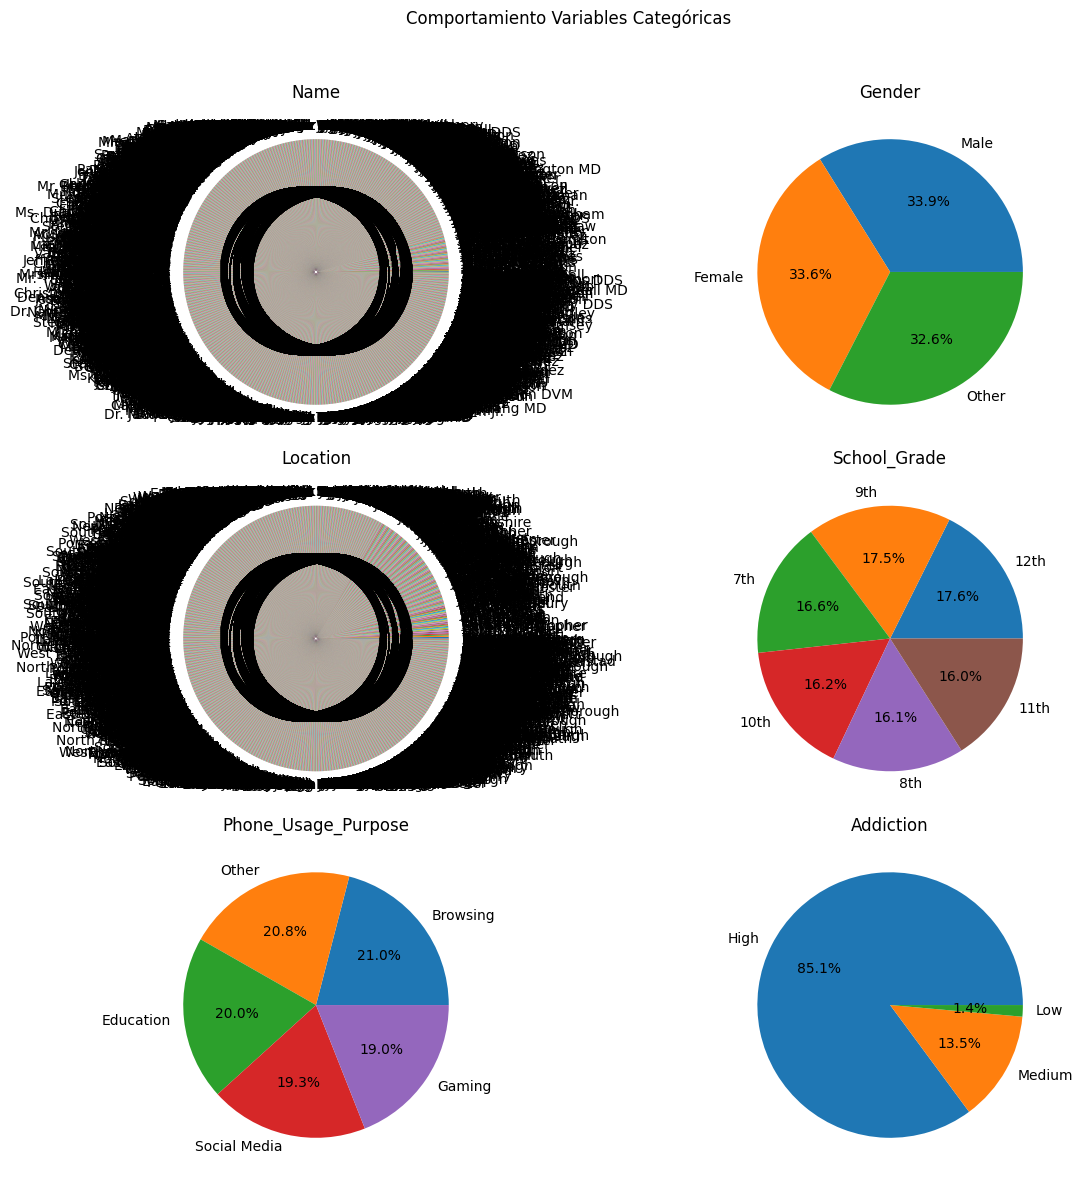

In [7]:
##GRÁFICOS DE TORTA
fig, ax = plt.subplots(3, 2, figsize = (12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

Name y Location puede complejizar el modelo si no se ignoran.
Muestras equidistribuidas que no sesgan el modelo.
No eliminar la y (Nivel de adicción) balancearla: Reducir la cantidad de individuos para que las clases sean equicompuestas o al contrario -> oversampling: crear individuos nuevos con low o medium para que sean equicompuestos
De entrada, el problema es desbalanceado


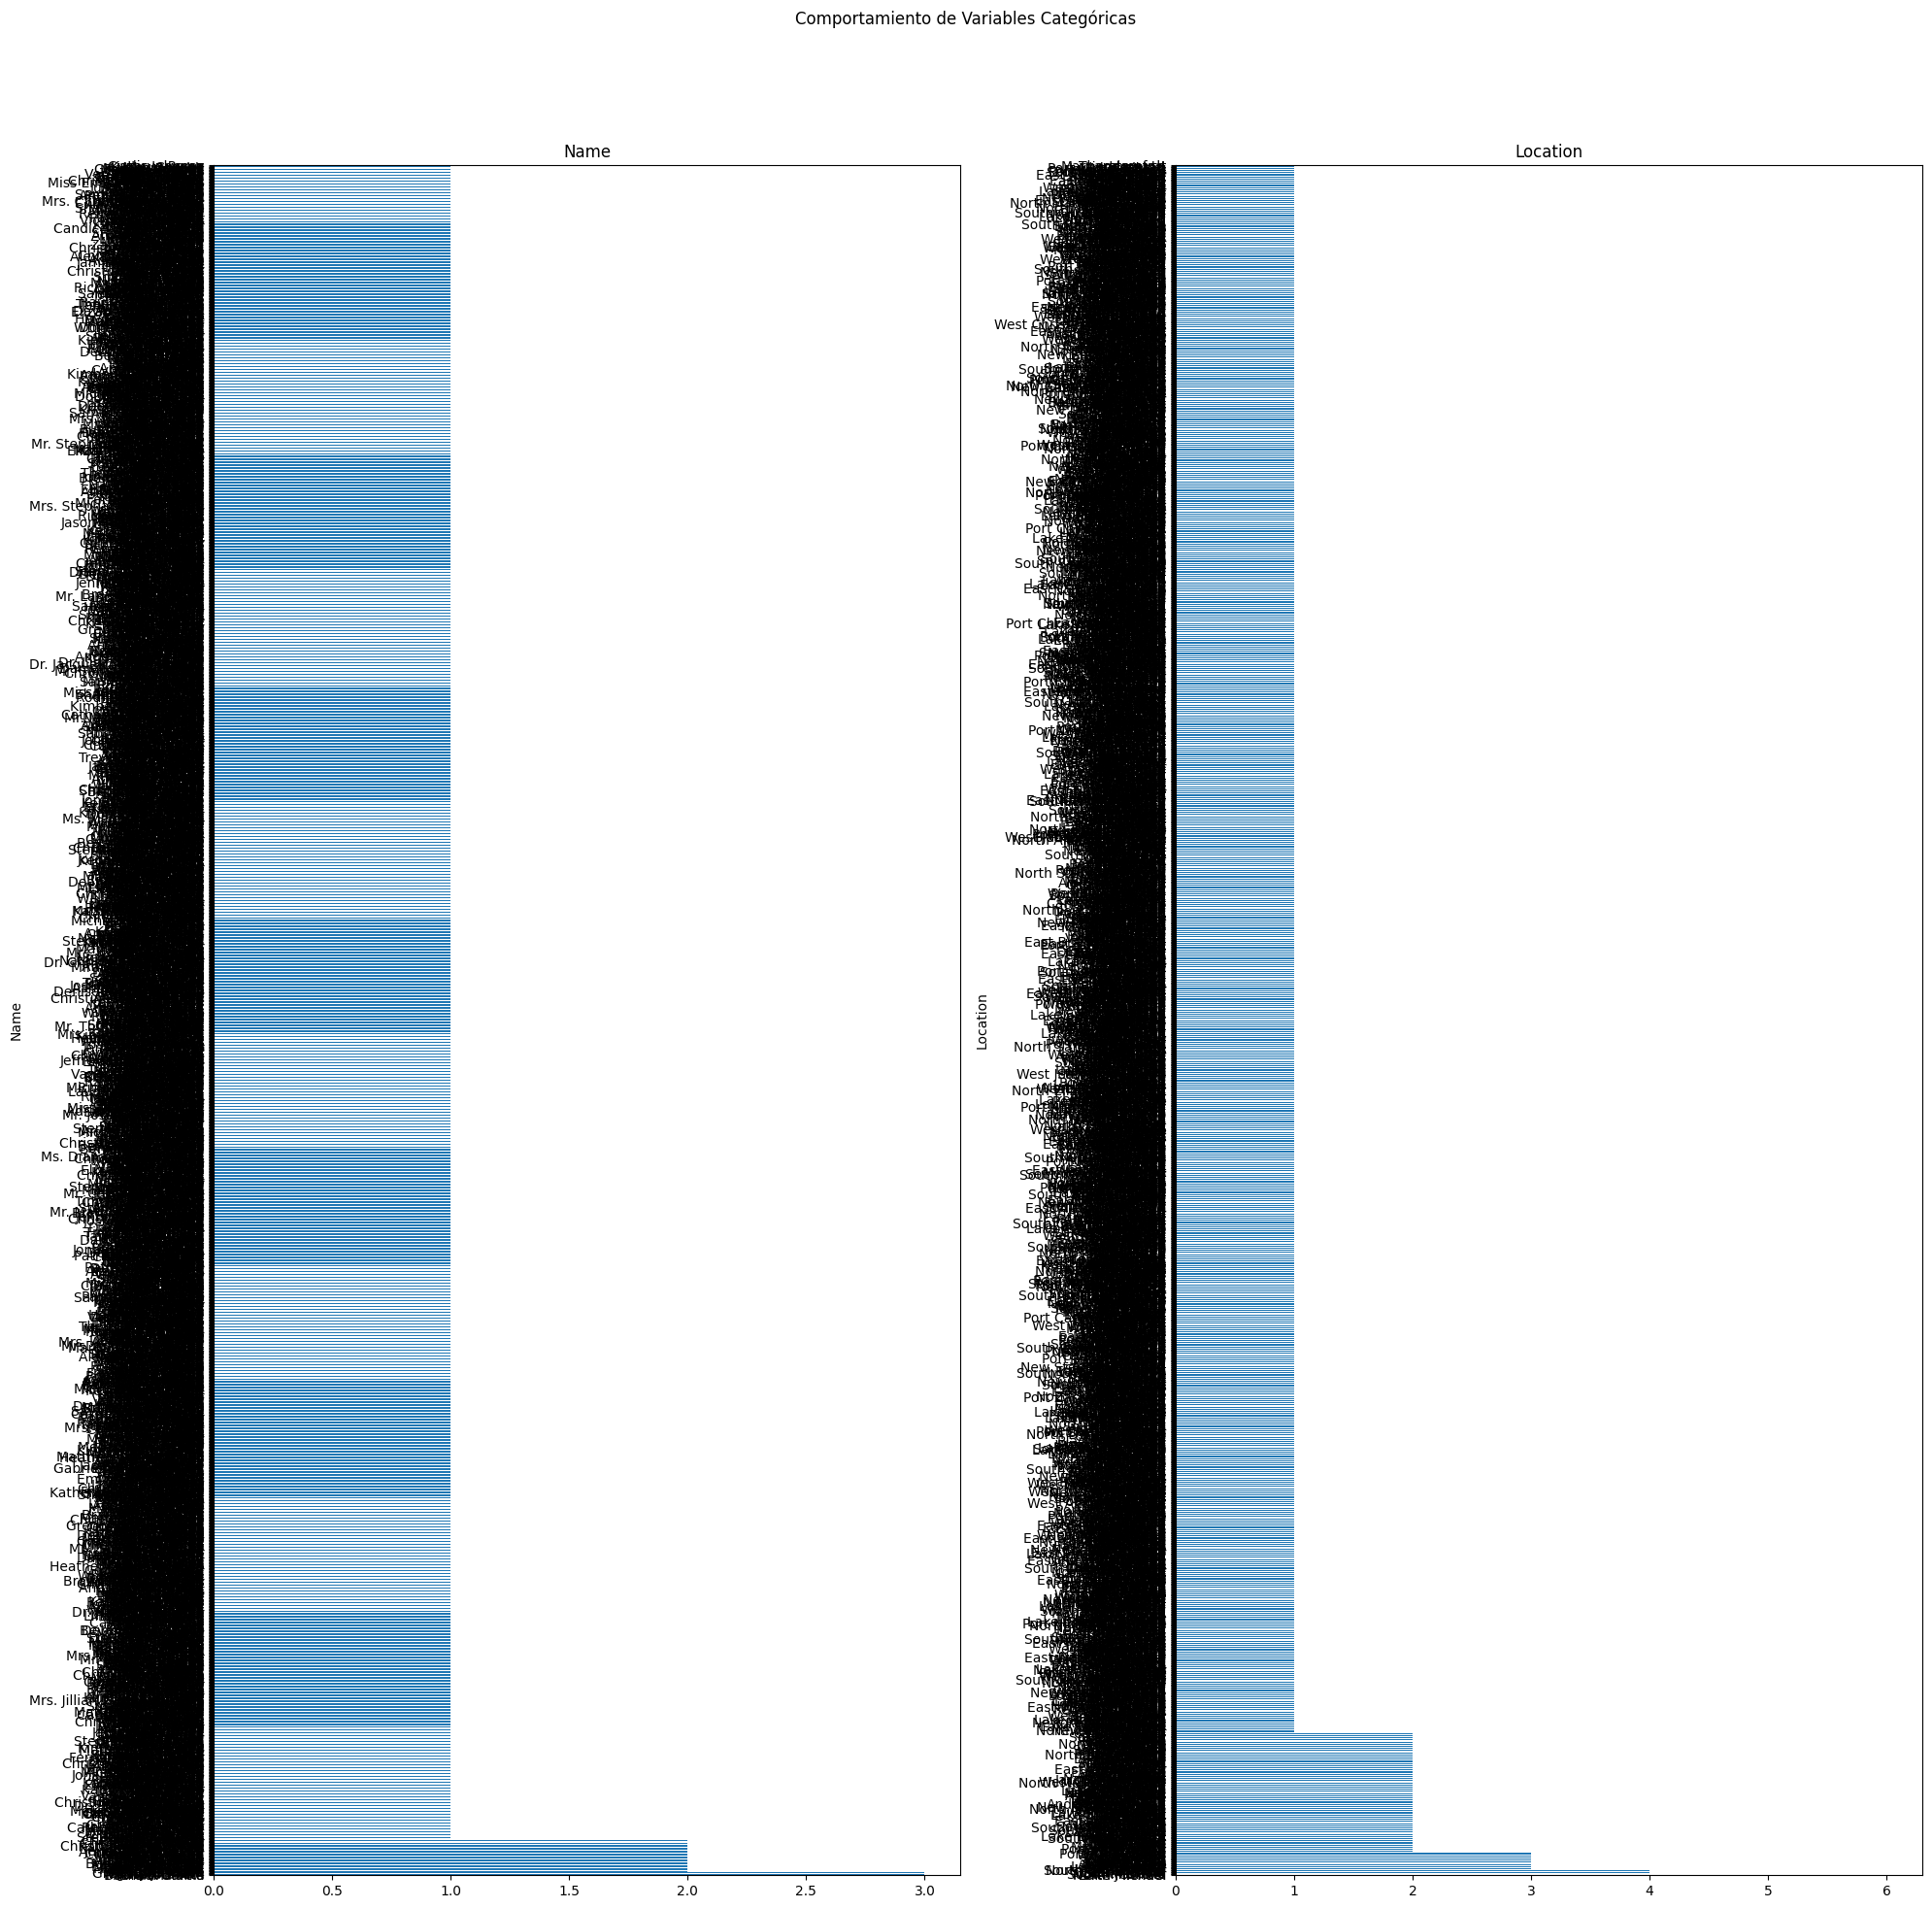

In [8]:
##Gráfico de barras para variables categóricas
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax = ax.flat

col = data[['Name', 'Location']]
for i, col in enumerate(col):
    data[col].value_counts().plot.barh(ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Categóricas')
plt.show()

# **6. Preparación de los Datos**

- Eliminar variables que no son significativas
- Completar variables que cuentan con datos nulos
- Balancear y (es más fácil balancear y después separar)
- Transformar los datos para que sean usables por el modelo
- Separar en conjuntos de entrenamiento y prueba


In [9]:
data_mod = data.drop(['ID', 'Name', 'Location', 'Age'], axis = 1)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   object 
 1   School_Grade            3000 non-null   object 
 2   Daily_Usage_Hours       2900 non-null   float64
 3   Sleep_Hours             2900 non-null   float64
 4   Academic_Performance    2900 non-null   float64
 5   Social_Interactions     2900 non-null   float64
 6   Exercise_Hours          3000 non-null   float64
 7   Anxiety_Level           2900 non-null   float64
 8   Depression_Level        3000 non-null   int64  
 9   Self_Esteem             3000 non-null   int64  
 10  Parental_Control        2900 non-null   float64
 11  Screen_Time_Before_Bed  3000 non-null   float64
 12  Phone_Checks_Per_Day    3000 non-null   int64  
 13  Apps_Used_Daily         2900 non-null   float64
 14  Time_on_Social_Media    3000 non-null   

In [11]:
data_mod.fillna(20).info() #imputación simple con método constante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   object 
 1   School_Grade            3000 non-null   object 
 2   Daily_Usage_Hours       3000 non-null   float64
 3   Sleep_Hours             3000 non-null   float64
 4   Academic_Performance    3000 non-null   float64
 5   Social_Interactions     3000 non-null   float64
 6   Exercise_Hours          3000 non-null   float64
 7   Anxiety_Level           3000 non-null   float64
 8   Depression_Level        3000 non-null   int64  
 9   Self_Esteem             3000 non-null   int64  
 10  Parental_Control        3000 non-null   float64
 11  Screen_Time_Before_Bed  3000 non-null   float64
 12  Phone_Checks_Per_Day    3000 non-null   int64  
 13  Apps_Used_Daily         3000 non-null   float64
 14  Time_on_Social_Media    3000 non-null   

Transformar de manera ordinal las variables categóricas con miras a imputar los datos

In [13]:
import sklearn
import sklearn.preprocessing
categorical_cols = data_mod.select_dtypes(include = 'object').columns 
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(), categorical_cols), remainder = 'passthrough')
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['Gender', 'School_Grade', 'Phone_Usage_Purpose', 'Addiction'], dtype='object'))])

In [14]:
data_transformed = pd.DataFrame(categorical_transformer.fit_transform(data_mod),
                                columns = categorical_transformer.get_feature_names_out(),
                                index = data_mod.index).rename(columns = lambda x: x.removeprefix('ordinalencoder__')).rename(columns = lambda x: x.removeprefix('remainder__'))
data_transformed

Gender  School_Grade  Phone_Usage_Purpose  Addiction  Daily_Usage_Hours  \
0        0.0           5.0                  0.0        0.0                4.0   
1        0.0           3.0                  0.0        0.0                5.5   
2        2.0           1.0                  1.0        0.0                5.8   
3        0.0           2.0                  4.0        0.0                3.1   
4        2.0           5.0                  2.0        0.0                2.5   
...      ...           ...                  ...        ...                ...   
2995     0.0           2.0                  NaN        0.0                3.9   
2996     0.0           4.0                  2.0        2.0                3.6   
2997     2.0           3.0                  4.0        2.0                3.2   
2998     0.0           5.0                  0.0        0.0                6.7   
2999     1.0           0.0                  1.0        2.0                3.5   

      Sleep_Hours  Academic_Performance  Social_Interactions  Exercise_Hours  \
0             6.1                  78.0                  5.0             0.1   
1             6.5                  70.0                  5.0             0.0   
2             5.5                  93.0                  8.0             0.8   
3             3.9                  78.0                  8.0             1.6   
4             6.7                  56.0                  4.0             1.1   
...           ...                   ...                  ...             ...   
2995          6.4                  53.0                  4.0             0.9   
2996          7.3                  93.0                  5.0             0.0   
2997          6.5                  98.0                  1.0             0.0   
2998          7.5                  67.0                  3.0             0.2   
2999          6.9                  79.0                  4.0             2.1   

      Anxiety_Level  ...  Self_Esteem  Parental_Control  \
0              10.0  ...          8.0               0.0   
1               3.0  ...          3.0               0.0   
2               2.0  ...         10.0               NaN   
3               9.0  ...          3.0               0.0   
4               1.0  ...          1.0               0.0   
...             ...  ...          ...               ...   
2995            7.0  ...          2.0               1.0   
2996            8.0  ...          9.0               1.0   
2997            4.0  ...          9.0               NaN   
2998            3.0  ...          9.0               0.0   
2999            4.0  ...          5.0               1.0   

      Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used_Daily  \
0                        1.4                  86.0             19.0   
1                        0.9                  96.0              9.0   
2                        0.5                 137.0              8.0   
3                        1.4                 128.0              7.0   
4                        1.0                  96.0             20.0   
...                      ...                   ...              ...   
2995                     0.3                  80.0             15.0   
2996                     0.9                  45.0              8.0   
2997                     0.2                  51.0             13.0   
2998                     1.6                 125.0             17.0   
2999                     0.6                 117.0              8.0   

      Time_on_Social_Media  Time_on_Gaming  Time_on_Education  \
0                      3.6             1.7                1.2   
1                      1.1             4.0                1.8   
2                      0.3             1.5                0.4   
3                      3.1             1.6                0.8   
4                      2.6             0.9                1.1   
...                    ...             ...                ...   
2995                   2.7             1.8             

Variables categóricas de forma ordinal para imputar las variables por modelo

In [15]:
#Imputación por vecindad
knn_imputer = sklearn.impute.KNNImputer(n_neighbors = 10) 
data_knn_df = pd.DataFrame(knn_imputer.fit_transform(data_transformed).round(),
                           columns = data_transformed.columns,
                           index = data_transformed.index)
data_knn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   float64
 1   School_Grade            3000 non-null   float64
 2   Phone_Usage_Purpose     3000 non-null   float64
 3   Addiction               3000 non-null   float64
 4   Daily_Usage_Hours       3000 non-null   float64
 5   Sleep_Hours             3000 non-null   float64
 6   Academic_Performance    3000 non-null   float64
 7   Social_Interactions     3000 non-null   float64
 8   Exercise_Hours          3000 non-null   float64
 9   Anxiety_Level           3000 non-null   float64
 10  Depression_Level        3000 non-null   float64
 11  Self_Esteem             3000 non-null   float64
 12  Parental_Control        3000 non-null   float64
 13  Screen_Time_Before_Bed  3000 non-null   float64
 14  Phone_Checks_Per_Day    3000 non-null   

In [16]:
#Imputación recursiva
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
recursive_imputer = sklearn.impute.IterativeImputer(estimator = RandomForestRegressor(),
                                                    initial_strategy = 'mean',
                                                    max_iter = 10)
data_recursive_df = pd.DataFrame(recursive_imputer.fit_transform(data_transformed).round(),
                                 columns = data_transformed.columns,
                                 index = data_transformed.index)
data_recursive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   float64
 1   School_Grade            3000 non-null   float64
 2   Phone_Usage_Purpose     3000 non-null   float64
 3   Addiction               3000 non-null   float64
 4   Daily_Usage_Hours       3000 non-null   float64
 5   Sleep_Hours             3000 non-null   float64
 6   Academic_Performance    3000 non-null   float64
 7   Social_Interactions     3000 non-null   float64
 8   Exercise_Hours          3000 non-null   float64
 9   Anxiety_Level           3000 non-null   float64
 10  Depression_Level        3000 non-null   float64
 11  Self_Esteem             3000 non-null   float64
 12  Parental_Control        3000 non-null   float64
 13  Screen_Time_Before_Bed  3000 non-null   float64
 14  Phone_Checks_Per_Day    3000 non-null   

In [ ]:
#ahora vamos a devolver en términos del data recursive que est´ra completamente en fdatos numéricos, dependiendo de la cantidad de categorias que se tengan se imputarán de diferente manera  
data_recursive_df

In [ ]:
data_imputed=data_recursive_df.copy()
data_imputed[categorical_cols]=(categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X=data_recursive_df[categorical_cols]))
data_imputed

###  Ahora vamos a valanciar a y (está desvalanceada por defecto) y= addiction. 
Se puede hacer el balanceo por:
- Submuestreo (data reduction): Llevar la o las clases de mayor frecuencia al tamaño de la de menor frecuencia Es decir de forma aleat se empieza a eliminar individuos hasta que sean de menor frecuencia.
Mejor en entornos big data (1millon de datos) donde la eliminacion no es preocupante, pero no es lo ideal en todos los modelos
Sería llevar tanto hight como medium al tamaño de low 
- Remuestreo (Data argumentation) : Llevar la o las clases de mayor frecuencia al tamaño de mayor frecuencia. 
Se recrea cierta cantidad de elementos. 
Se puede hacer :
1. de forma aleatoria o replicacion: un mismo individuo se genera muchas veces, se utilizan a ellos mismos para aumentar las secuencias de los datos 
2. Usando funcones de densidad de probabilidad o de masa de probabilidad, a veces las variables no son parametricas entonces es más duro desarrollar. SMOTE/ SMOTE TONEK tratan de estimar y crear individuos nuevos, se puede hacer despues 


In [ ]:
data_high= data_imputed[data_imputed['Addiction']== 'High']
data_medium=data_imputed[data_imputed['Addiction']== 'Medium']
data_low=data_imputed[data_imputed[''Addiction]=='Low']
print(f'El tamaño de la clase high es :{data_high.shape}\n El tamaño d ela clase medium es {data_medium.shape}\nEl tamaño de la clase low es: {data_low.shape}')

In [ ]:
data_medium_re= data_medium.sample(data_high.shape[0], replace=True)
data_low_re=data_low.sample(data_high.shape[0], replace=True)
data_balanced= pd.concat([data_high, data_medium_re, data_low_re])
data_balanced.reset_index(drop= True,implace=True)
data_balanced.info()

In [ ]:
#vamos a confirmar que está balanceada 
plt.pie(x=data_balanced.Addiction.value_count(), labels= data_balanced.Addiction.value_counts().index, autopct='%0.1%')
#vamos a tranformar siempre en claseficacion, donde se sebaran las x de las y. Con el objetivo de aplicarles el min max scaller.

In [ ]:
x= data_balanced.drop('Addiction', axis= 1)
y = data_balanced[['Addiction']]
print(f'El tamaño de x es: {x.shape} El tamaño de y es: {y.shape}')
#genero, grado y telefono no tienen más de 25 características. En caso de haber usado location y name seria un paso adicional que se tendría que tener en cuenta relacionado con clasificación ordinal 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_col= X.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_col= X.select_dtypes(include=['object']).columns.to_list()
num_transformer= Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers= [('num', num_transformer, num_col),
                                                (' cat', cat_transformer, cat_col)],
                                                remainder= 'passthrough')
preprocessor

In [ ]:
X_pre = preprocessor.fit_transform(X)
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out (cat_col)
labels = np.concatenate([num_col, cod_cat])
X_pro=pd.DataFrame(X_pre,columns=labels)
X_pro.head(10)
#python los que hace es una matriz dispersa, una matriz llena de 0 y 1, es una vista comprimida de los datos 


In [ ]:
#Separacion del conjunto y prueba es el ultimo paso 
from sklearn.model_selection import train_test_split

# por defecto usa 2/3 para entrenar y 1/3 para testear

X_train, X_test, Y_train, Y_test = train_test_split(X_pro, y, train_size=0.7, random_state=42)
print (f'El tamaño de X train es {X_train.shape} ') 
print (f'El tamaño de X_test es {X_test.shape}') 
print (f'El tamaño de Y_train es {Y_train.shape}') 
print (f'El tamaño de Y_test es {Y_test.shape}')

In [ ]:
plt.pie(x=Y_train.Addiction.value_counts(), labels=Y_train.Addiction.value_counts().Index, autopct='%0.1f%%')
plt.show()

In [ ]:
plt.pie(x=Y_test.Addiction.value_counts(), labels=Y_test.Addiction.value_counts().index, autopct='%0.1f%%')
plt.show()

# modelos de clasificación 
- Vamos a explorar desde la parte teorica como funcionan los modelos y ver cómo funcionan en la parte práctica 
- Vamos a utilizar en los modelos busqueda de hiperparametros con validación cruzada 
- Se les dará una región de búsqueda a los hiperparamentros, para porder evitar el sobreajuste, a su vez los modelos de datos pueden estar en 3 estados 
1. Ajustado Dent= Dval-->1
2. Subajustado : desempeño en entrenamientos es menor a desempeño en validación pero Dent = Dval < 0.5
3. Sobreajustado : desempeño en entrenamiento es mucho mayor que el desempeño en validación (mas del 20 % relativo ) el modelo está sonreajustado. Dent>>>Dval
#### El desempreño en clasificacion 
- Matriz de confución:  arreglo o matriz cuadarada que va a clasificar cómo se está dando la organización de la variable y. la y tiene 2 posibles valores, puede tener una connotación negativa que se marca con 0, y conotación positiva que se marca con 1. En la parte de las columnas van las predicciones y en las filas van las realidades. 
Se busca que la suma de verdaderos positivos sea igual a la suma de 
A partir de la matriz de confusión salen las demás formas

### Regresión logistica 
### K vecinos más cercanos
### Naive Bayes
### Maquinas de soporte vectorial
### Arboles de desición 
### bosques aleatorios 
### Adaptative boosting 
### gradient boosting
### redes neuronales percepción multicapa



###Regresión logistica 
queremos entrenar un modelo que sea capaz de identífical a que clase perenece un individuo ante su existencia. 
Combiancion lineal de las características de la forma y=do + sum de n con i =j dixi (n es la cantidad de carácterísticas)
Los valores que puede tomar y están en todos los reales.
Existe un clasificador duro 
o(y)=1/1+e^-y R=[0,1]
Lo que pase por el clasificador duro si pasa por encima del umbral lo vuelve verde o si es menor rojo. Osea que la salida del clasificador da la característica. 
Y= 0 si 1/1+e^-alpha0 + sumdixi < 0.5
Y=1 si 1/1+e^-alpha0 + sumdixi >= 0.5
El objetivo de la regresión logística es encontra los valores de alphai que minimicen el error de pronostico. Es un proceso de optimizacion, se va a encontrar los mejores alphas que hagan de este error lo minimo posible 
- Tenemos un error cuadrático ((y -ý)^2) y uno absoluto (|y-ý|). Para poder encontrar esos alphas se tiene que asociar a un tipo de error.
Habitualmente se encuentra el punto de minima derivando la funcion de error. 
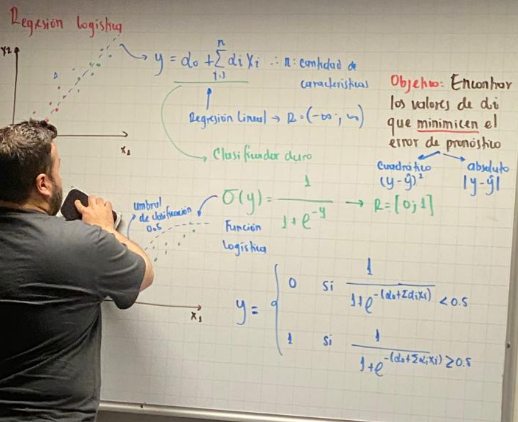
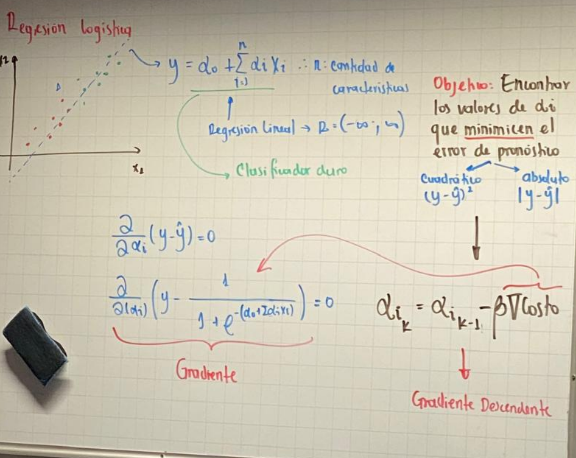
Con beta el paso que se mueve para llegar al punto de minima, es como el paso de estimacion. Se puede hacer que beta llegue al punto de mínima. Hay qur intentar encontrarlo y por eso se hace búsqueda de hiperparametros. 
beta es un real positivo, osea que tiene infinitos valores. 
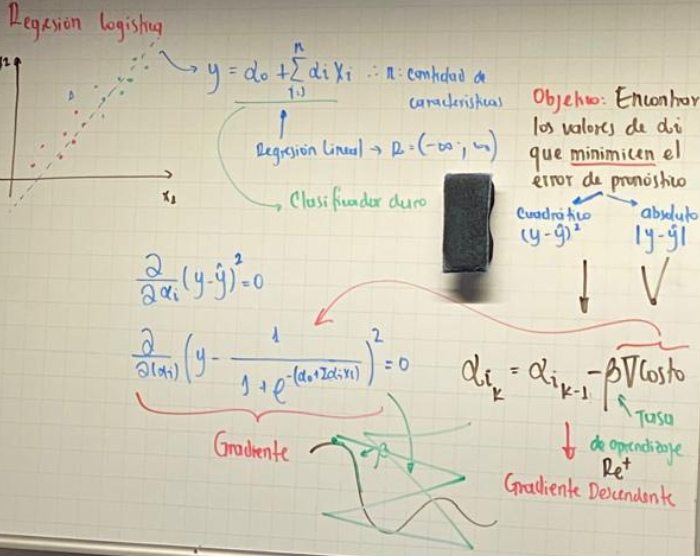 
El solo el gradiente del costo tiene un solución análitica.
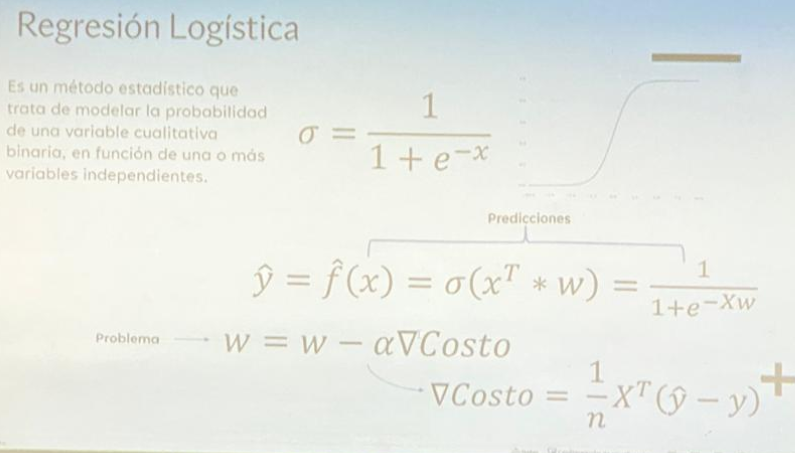

###Búsqueda de hiperparametros 
tiene dos formas
- Exaustiva: Que va a crear tantos modelos como posibles combinaciones de los hiperparametros y los ajusta todos 
h1 : [0, 5, 28, 32] 
h2: [a, b, c]
La cantidad de modelos es igual a la combinacion o el producto de los hiperparametros Qmodelos = Productoria hi 
- Aleatorizada: Crea una mustra aleatoria de todos los posibles modelos construidos por la combinación de los hiperparametros 
h1 : [0,5 , 28, 32] 
h2 : [a, b, c]
n= 5
- Cuando son pocos hiperparametros se puede tomar exaustiva y si es algo que quiera rápido escoger aleatorizado. Cuando se quiere algo exacto o una búsqueda exaustiva es mejor escojer el primero pero se demora más
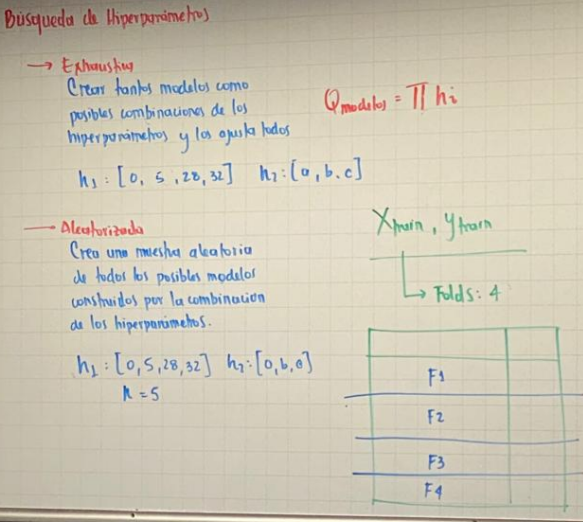

Una búsqueda exaustiva con 4 fold tengo una 12 modelos con 4 experimentos osea 48. No deben ser más de 10 particiones de los datos 
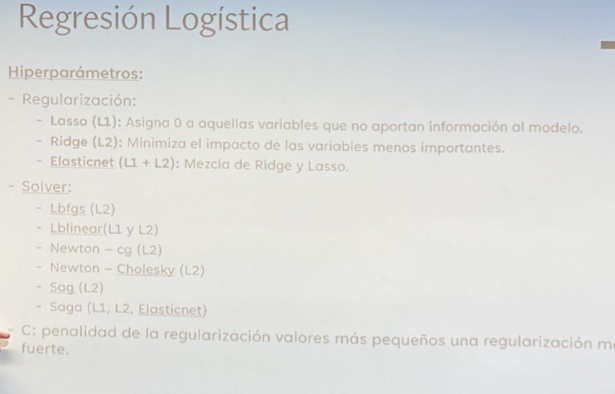
 





#** 7. Modelado de datos**
- Regresión logística 
- k vecinos más cercanos 
- Maquina de soperte vectorial
- Arboles de desición 
- Bosque Aleatorio 
- Adaptative Boosting 
- Gradient Boosting 
- RNA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#vamos a crear el primer modelo y vamos a construir región de búsqueda de los hiperparametros 

modelo_1 = LogisticRegression(solver= 'saga', random_state= 123)
param_grid= {'penalty':['11','12','elasticnet'], 'C':[0.0001, 0.001, 0.01,0.1,1,10,100,1000]} #Ayuda a hacer la búsqueda de manera iterativa pero más conciente 
clf_1= GridSearchCV(estimator=modelo_1, param_grid= param_grid, cv=5, scoring='accuracy') #busqueda exaustiva con 8c con 3 penalidades osea 24. Busca mejor combinacion de hiperparametros de modo que se tenga la mejor estimacion del error 
#Estas particiones se hacen para evitar el sobreajuste. F1 se pone ya que mezcla el recode y la presición se usa como método de scol ya uqe mejora la estimicion de los hipeparámetros 
clf_1.fit(X_train, y_train)




In [ ]:
validation= pd.concat([pd.DataFrame(clf_1.cv_results_['params']),
                       pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns=['accuracy'])], axis=1)
validation.sort_values('accuracy',ascending=False)


In [ ]:
modelo_1_final=clf_1.best_estimator_
modelo_1_final

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred_1_train =modelo_1_final.fit(X_train)
print('MEtricas de desempeño en entrenamiento')
print(classification_report(y_train, y_pred_1_train))
sb.heatmap(confusion_matrix(y_train, y_pred_1_train), annot = True, fmt='d')
plt.show()


#** 8. algo era**

In [ ]:
y_pred_test_1 = modelo_1_final.predict(X_test)
print('Metricas de desempeño en validacion')
print(classification_report(y_test, y_pred_1_train))
sb.heatmap(confusion_matrix(y_test, y_pred_1_train), annot = True, fmt='d')
plt.show()

Principio de vecindad: nos permite poder estimar una clasificacion. Es impar porqué reduce la posibilidad de empate. 
Se pueden tener hasta la cantidad todat de datos que se tienen de vecinos. k es un entero positivo.
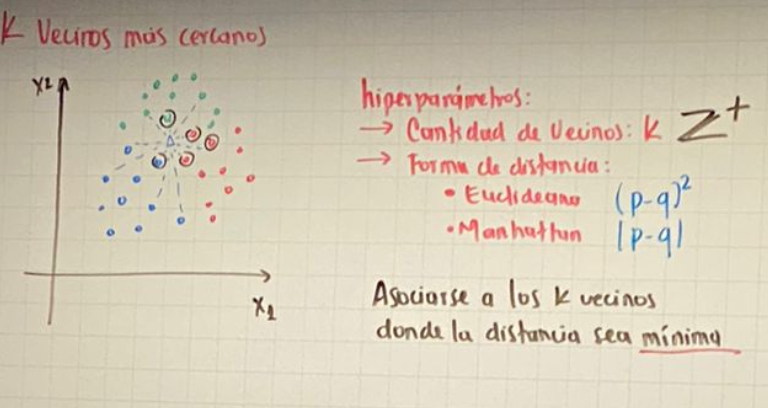

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo_2= KNeighborsClassifier()
param_grid = {'n_neighbors':[3, 5, 7, 19, 21, 53], 'p':[1,2]}
clf_2= GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv= 5, scoring='f1_weighted')
clf_2.fit(X_train,Y_train)

In [ ]:
validation= pd.concat([pd.DataFrame(clf_2.cv_results_['params']),
                       pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns=['f1'])], axis=1)
validation.sort_values('f1',ascending=False)

Según el f1 para este caso es mejor es la regresión llogistica, porque al mirar el acc general es de 0.99 y las gráficas están mejores con presición.
me falta terminar algo 

### Máquinas de soporte vectorial

El caso de soporte defina la parte donde se puede cometer un error
- Se asocia un parametro asociado a ese error 
- Permite que se cometa mayor o menor error
- Entre más c tiende a 0 decimos que hay una menor penalización, osea que ese le está permitiendo a esa frontera ser mucho más grande. Le permito al métod equivocarse mas. 
Entre la c sea mas grande se genera una mayor penalizacion y por lo tanto se equipoque menos pero se tienda a ajustar mucho más rpico. O sobreajustarse
Una maquina de soporte vectorial tiende a ajustarse más rápido 
- Los problemas no lineales son los que más aparecen, pero se puede generar transformación vectorial generando una nueva dimension a traves de la cual se tenga la posibilidad de crear una aproximacion lineal para separar
- hiperplano líneal capaz de separar 
Kernel :  es una nueva dimesion que construye un separador lineal capaz de separar datos en partícular -- el kernel es otro hiperparametro 

* muy importante *


In [ ]:
#modelo 3 
from sklearn.svm import SVC
modelo_3=SVC(random_state = 123)
param_grid={'C':[0.0001, 0.001,0.01,0.1,1,10,100,1000], 'kernel' :['lineal','poly','rbf','sigmoid'], 'degree':[2,3,4]}
clf_3=GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_3.fit(X_train, y_train)



In [ ]:
validation = pd.concat([pd.DataFrame(clf_3.cv_results_['params']), pd.DataFrame(clf_3.cv_results_'[mean_test_score'], columns= ['f1'])], axis=1)
validation.sort_values('f1', ascending=False)

## Arboles de desición 
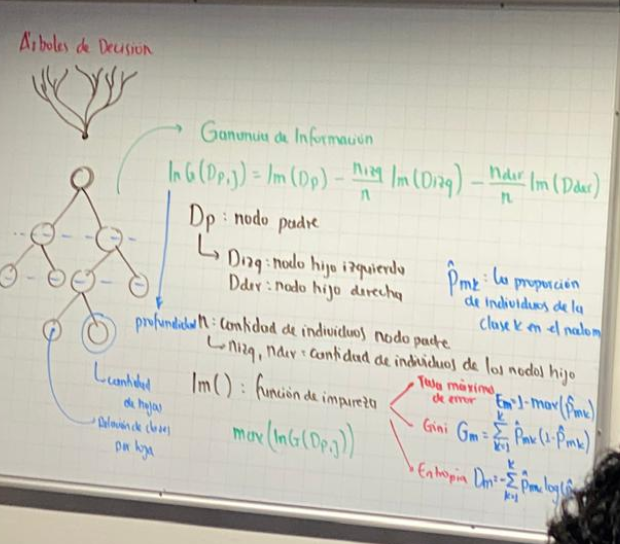
El arbos es explicable desde su estructura, se puede ver como funcionó la toma de desición 

- preg sebas
Ganancia de información 
ln--
Entre más mezcla de clases se tenga más puro será el nodo  
y entre menos mezcla de clases más impuro será 
Las impurezas pueden ser del tipo ( tasa máxima de error (Em=1-max(´pmk-relación de individuos de la clase k en el nodo m))El arbol busca que sea lo más cercano a 0,Criterio de gini(Gm=sum(´pmk(1-´pmk))Sumatoria del producto de la proporcion, o de rechazo ), Entropia (Dm=-sum())Es el logaritmo de la proporcion, en caso de ´p =1 ent será 0, )Se puede elegir. 
Va a crecer hasta que le quede así sea un individuo por rama 
Lo que se busca es generalizar el proceso o problema representado por los datos. 
Para evitar que se sobreajuste se implementa la poda del arbol o restringir la caoacidad de crecimiento. Se restringe tomando criterio de impureza diferente. O limitandolo en que cada oja tenga un individuo de una clase diferente... Todo individuo que límite será un hiperparametro (profundiddad, cantidad de hojas, relación de clase por hoja)-- limitar la forma que un arbor de desición crece. La mayoria de los métodos de ensamble (importante comprender como funciona el arbor para saber como funcionan los métodos de ensambre)
un nodo es una variable -- A la larga se separa individuos por la información que se conoce de ellos 
-- Para la mayoria de los casos ese algo es 0.85
Siempre duden de un modelo perfecto 




In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo_4= DecisionTreeClassifier(random_state=123)
param_grid = {'criterion':['log_loss','gini', 'entropy'], 'max_depht':[None, 5, 10, 15, 20], 'max_leaf_nodes':[None,10,20,50], 'min_samples_split':[2,3,4]}
clf_4=GridSearchCV(estimator=modelo_4, param_grid=param_grid,cv=3, scoring='f1_weighted')
clf_4.fit()

In [ ]:
validation = pd.concat([pd.DataFrame(clf_4.cv_results_['params']), pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns= ['f1'])], axis=1)
validation.sort_values('f1', ascending=False)

In [ ]:
modelo_4_final= clf_4.best_estimator_
fig, ax = plt.subplots(figsize=(15,8))
print(f'profundidad del arbol:{modelo_4_final.get_depth()}\nNumero de hojas: {modelo_4_final.get_n_leaves()}')
plot=plot_tree(decision_tree= modelo_4_final,feature_names= labels, filled=True, impurity=False,ax=ax)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred_4_train =modelo_4_final.fit(X_train)
print('MEtricas de desempeño en entrenamiento')
print(classification_report(y_train, y_pred_1_train))
sb.heatmap(confusion_matrix(y_train, y_pred_1_train), annot = True, fmt='d')
plt.show()

In [ ]:
y_pred_test_4 = modelo_4_final.predict(X_test)
print('Metricas de desempeño en validacion')
print(classification_report(y_test, y_pred_1_train))
sb.heatmap(confusion_matrix(y_test, y_pred_1_train), annot = True, fmt='d')
plt.show()

## Modelos de ensable 
- Foto: 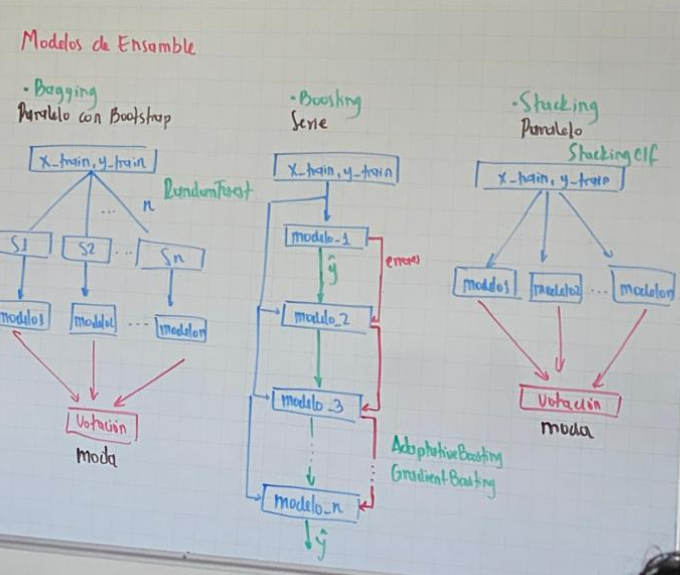

- tecnica de aprendizage automático que pretende ensamblar modelos weak learners o de bajo desempreño (ajuste por encima de 0.5 pero no muy lejano)
Son de 3 familias 
#### Tipo Bagging 
- Ensamblados en paralelo con Bootstrap, que significa que toma el conjunto de datos de entrenamiento y los separa en n cantidad de subconjuntos y para cada subconjunto va a ajustar un modelo. Esas respuestas se van a combinar en una votación, entonces el modelo 1 dice algo y los otros dicen otra cosa, el modelo final dice la que más frecuente está representada
- Random forest: multiples arboles ensamblados en diferentes plataformas, cada arbol entrega su respuesta al evaluar. El bosque decidirá dependiendo cual haya tenido más frecuencia.  Tienen que ser arboles
#### Tipo Bosstinf 
- Ensamplados con sene 
- Tiene el conjunto de datos y va a entrenar ese primer modelo con todos los datos, este va a entregar predicciones y va a entregar errores, que van a ir a un modelo 2 al que le entra lo que salió del 1. El modelo 2 generará errores y predicciones que irán a un modelo 3, donde entrarán datos, predic, y errores. No existe una votación sino que entregan las predicciones del último modelo. 
- Internamoente dependiendo del tipo de modelo se tienen los, difieren en como manejan el error en el modelo :
    - Adaptative boosting : va a entrenar cada modelo en serie con los datos y va a entrenarlo con modelos del predecesor, hasta que llega al modelo n. es una respuest aponderada, pues le da peso al modelo 1 , 2, 3, .. n. Por lo tanto es que ajusta el buen arbol sino que encuentra cual es el peso que le tiene que entregar a cada arbol para que si no aprende bien de los errores va a propagar ese error. Entonces si no está bien hecho pues va a dañar el modelo al hacerlo más debil con el paso del tiempo
    - Gradient boosting :  Es una generalización del modelo Adabosst que permite emplear cualquier función de costo que sea diferenciable. Su operacion se basa en ajustar 
    - agregar arboles a medida que se va ajustando, se ajusta el primer weak learner 
    El gradiente es la tasa de conversion hasta el primer optimo esperado, es el modelo de ensamble más preceso pero el más complejo computacionalemnte. Matemáticamente va aensamblando los errorres, si se tienen 1000 arboles se deben hacer mil restas, por eso exixten 2 derivaciones LGboost , LTboostotra. Para reducir su complejidad computacional.
#### Tipo Stacking
- La complejidad computacional de esto es mayor, pues junta toda esa vuelta
- Va en paralelo. A todo el conjunto de datos los envia para diferentes modolos y tenemos la votacion que es la moda 
- Stacking classifier: no le permite mezclar los modelos pues dice que el separador clave es tal 
- chat confunde los desempeños. 
